<a href="https://colab.research.google.com/github/southjohn64/exercises/blob/main/reg_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn as sk
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Read data

In [6]:
df_train_skills = pd.read_csv('/content/X_train.csv')
df_train_skills.head()

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
0,2477,2477,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,2477,1150.0
1,76,76,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,76,1100.0
2,64,64,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,64,26.0
3,924,924,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,924,279.0
4,242,242,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,242,380.0


In [7]:
df_train_skills.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Age', 'Gender', 'Education Level',
       'Job Title', 'Years of Experience', 'Country', 'Race', 'height',
       'weight', 'id', 'professionalism'],
      dtype='object')

In [8]:
df_train_skills = df_train_skills[['Age', 'Gender', 'Education Level','Job Title', 'Years of Experience', 'Country', 'Race', 'height','weight', 'id', 'professionalism']]
df_train_skills.set_index('id',drop=True,inplace=True)
df_train_skills

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,professionalism
id,,,,,,,,,,
2477,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,1150.0
76,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,1100.0
64,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,26.0
924,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,279.0
242,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,380.0
...,...,...,...,...,...,...,...,...,...,...
354,32.0,F,bachelor,junior|business|development|associat,4.0,canad,Black,2.329507,64.070050,93.0
3677,44.0,M,p,data|scientis,15.0,chin,White,1.945457,93.478548,546.0
6032,25.0,M,high|scho,delivery|drive,1.0,canad,Asian,1.575751,38.216264,0.0


In [9]:
df_train_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 2477 to 3572
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5359 non-null   float64
 1   Gender               5359 non-null   object 
 2   Education Level      5360 non-null   object 
 3   Job Title            5361 non-null   object 
 4   Years of Experience  5360 non-null   float64
 5   Country              5363 non-null   object 
 6   Race                 5363 non-null   object 
 7   height               5363 non-null   float64
 8   weight               5361 non-null   float64
 9   professionalism      5360 non-null   float64
dtypes: float64(5), object(5)
memory usage: 460.9+ KB


In [10]:
df_y_train_skills = pd.read_csv('/content/y_train.csv',index_col=[0])
df_y_train_skills.head()

,Salary
2477,175966.0
76,160000.0
64,35000.0
924,195000.0
242,120000.0


In [11]:
df_y_train_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 2477 to 3572
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  5358 non-null   float64
dtypes: float64(1)
memory usage: 83.8 KB


array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

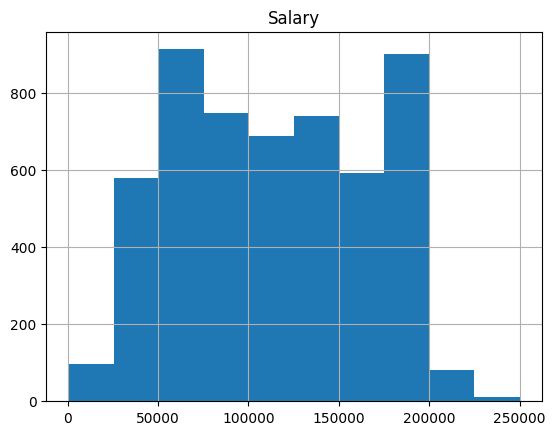

In [34]:
df_y_train_skills.hist()

TEST

In [43]:
df_test_skills = pd.read_csv('/content/X_test.csv')
df_test_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1341 non-null   int64  
 1   Unnamed: 0           1341 non-null   int64  
 2   Age                  1341 non-null   float64
 3   Gender               1341 non-null   object 
 4   Education Level      1341 non-null   object 
 5   Job Title            1341 non-null   object 
 6   Years of Experience  1341 non-null   float64
 7   Country              1341 non-null   object 
 8   Race                 1341 non-null   object 
 9   height               1341 non-null   float64
 10  weight               1341 non-null   float64
 11  id                   1341 non-null   int64  
 12  professionalism      1341 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 136.3+ KB


# IMPUTE

In [48]:
def impute_missing_values(df_train, df_test , remove_row_missing_cat_data):
  imputer_dict = {}
  if remove_row_missing_cat_data:
    for col in df_train.columns:
        if df_train[col].dtype != 'object':
          imp = SimpleImputer(strategy='most_frequent')
          df_train[col] = imp.fit_transform(df_train[col])
          df_test[col] = imp.transform()
          imputer_dict[col] = imp
        else:
            df_train.dropna(subset=[col], inplace=True)
            df_test
  else:
    for col in df_train.columns:
        if df_train[col].dtype == 'object':
          imp = SimpleImputer(strategy='most_frequent')
        else:
          imp = SimpleImputer(strategy='mean')
        df_train[col] = imp.fit_transform(df_train[col])
        df_test[col] = imp.transform()
        imputer_dict[col] = imp
  return df_train , df_test,imputer_dict

In [52]:
df_train_skills['Age'].shape

(5363,)

In [49]:
# impute only continoues cols , remove rows
df_train_skills_copy = df_train_skills.copy()
df_test_skills_copy = df_test_skills.copy()

df_train_skills_copy,df_test_skills_copy = impute_missing_values(df_train_skills_copy,df_test_skills_copy,True)
print(f'df_train_skills shape : {df_train_skills.shape} , after impute df_train_skills_copy shape : {df_train_skills_copy.shape}')
print(f'df_test_skills_copy shape : {df_test_skills_copy.shape} , after impute df_test_skills_copy shape : {df_test_skills_copy.shape}')
df_train_skills_copy.info()

ValueError: ignored

In [37]:
#impute all
df_train_skills_copy = df_train_skills.copy()
df_train_skills_copy = impute_missing_values(df_train_skills_copy,False)
print(f'df_train_skills shape : {df_train_skills.shape} , after impute df_train_skills_copy shape : {df_train_skills_copy.shape}')
df_train_skills_copy.info()

df_train_skills shape : (5363, 10) , after impute df_train_skills_copy shape : (5363, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 2477 to 3572
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5363 non-null   float64
 1   Gender               5363 non-null   object 
 2   Education Level      5363 non-null   object 
 3   Job Title            5363 non-null   object 
 4   Years of Experience  5363 non-null   float64
 5   Country              5363 non-null   object 
 6   Race                 5363 non-null   object 
 7   height               5363 non-null   float64
 8   weight               5363 non-null   float64
 9   professionalism      5363 non-null   float64
dtypes: float64(5), object(5)
memory usage: 460.9+ KB


In [36]:
df_y_train_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 2477 to 3572
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  5363 non-null   float64
dtypes: float64(1)
memory usage: 83.8 KB


In [ ]:
#k-nearest, regression-trees, linear regression

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(df_train_skills,df_y_train_skills['Salary'])
y_pred = lin_reg_model.predict(df_train_skills)
y_true = df_y_train_skills['Salary']
mean_squared_error(y_true, y_pred, squared=False)

ValueError: ignored

In [9]:
mean_squared_error(y_true, y_pred, squared=False)

NameError: ignored